In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import re
import matplotlib.pyplot as plt
import weightedcalcs as wc

In [2]:
df = pd.read_csv('data/voter-survey-december16.csv')

In [6]:
calc = wc.Calculator('weight')
weight = df.weight
cols = ['presvote16post_2016', 'imiss_u_2016', 'weight']
df = df[cols]
df = df.fillna(0)
df.imiss_u_2016 = df.imiss_u_2016.astype(str)
df.dtypes
df = pd.get_dummies(df)
df.head()

In [10]:
calc.distribution(df, 'imiss_u_2016_1.0').round(3).sort_values(ascending=False)

imiss_u_2016_1.0
0    0.607
1    0.393
Name: weight, dtype: float64

In [13]:
#df.imiss_u_2016.value_counts()
#3545/8000 = .44

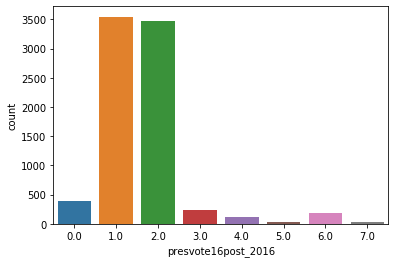

In [17]:
sns.countplot(df.presvote16post_2016)